In [6]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#Cargar la imagen
img = cv2.imread('C:/Users/nicol/Desktop/Prueba_2.jpg')  # Ajustar la ruta a tu imagen

# Cargar tu modelo previamente entrenado
model = tf.keras.models.load_model('C:/Users/nicol/Desktop/PatternNET_Xception.h5')


TypeError: Error when deserializing class 'Conv2D' using config={'name': 'block1_conv1', 'trainable': False, 'dtype': 'float32', 'filters': 32, 'kernel_size': [3, 3], 'strides': [2, 2], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}.

Exception encountered: module 'keras.src.activations' has no attribute 'get'

La imagen tiene el tamaño correcto.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicción: [1.3457126e-17 1.0000000e+00 0.0000000e+00 1.2992090e-18 0.0000000e+00]
Conteo de clases detectadas en la imagen:
Clase 1: 1 veces
Forma de predicción: (1, 5)


C:\Users\nicol\AppData\Local\Temp\ipykernel_20992\687547584.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_redimensionada = img_pil.resize(nuevo_tamanio, Image.ANTIALIAS)


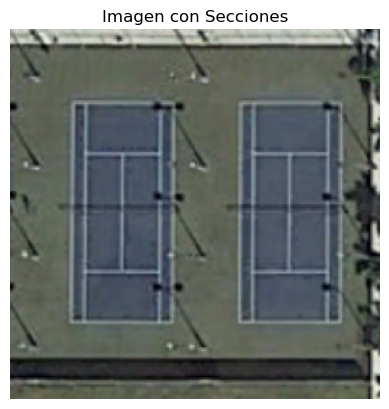

In [42]:

# Funciones de preprocesamiento
def redimensionar_imagen(img, nuevo_tamanio):
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    img_pil = Image.fromarray(img)
    img_redimensionada = img_pil.resize(nuevo_tamanio, Image.ANTIALIAS)
    return np.array(img_redimensionada)

def verificar_tamanio(img, tamanio_referencia):
    return img.shape[:2] == tamanio_referencia

def normalizar_imagen(img):
    img_normalizada = img / 255.0
    media = np.mean(img_normalizada, axis=(0, 1))
    img_normalizada -= media
    return img_normalizada


# Procesamiento de la imagen
img_redimensionada = redimensionar_imagen(img, (256, 256))

if verificar_tamanio(img_redimensionada, (256, 256)):
    print("La imagen tiene el tamaño correcto.")
else:
    print("La imagen no tiene el tamaño correcto.")

img_normalizada = normalizar_imagen(img_redimensionada)

# Definir el tamaño de la cuadrícula
grid_size = 1
height, width, _ = img_normalizada.shape
cell_height = height // grid_size
cell_width = width // grid_size

# Extraer las 4 secciones y aplicar el modelo
predicciones = []
conteo_clases = {}

for row in range(grid_size):
    for col in range(grid_size):
        # Coordenadas de la sección
        y_start = row * cell_height
        y_end = (row + 1) * cell_height
        x_start = col * cell_width
        x_end = (col + 1) * cell_width

        # Extraer la sección
        seccion = img_normalizada[y_start:y_end, x_start:x_end]

        # Redimensionar la sección a 256x256 para que coincida con el tamaño esperado
        seccion = redimensionar_imagen(seccion, (256, 256))

        # Expandir dimensiones para que sea compatible con el modelo
        seccion = np.expand_dims(seccion, axis=0)

        # Aplicar el modelo a la sección
        prediccion = model.predict(seccion)
        predicciones.append(prediccion[0])
        print(f"Predicción: {prediccion[0]}")

        # Identificar la clase con mayor probabilidad
        clase_predicha = np.argmax(prediccion)

        # Contar las predicciones por clase
        if clase_predicha in conteo_clases:
            conteo_clases[clase_predicha] += 1
        else:
            conteo_clases[clase_predicha] = 1

# Mostrar los conteos de cada clase
print("Conteo de clases detectadas en la imagen:")
for clase, conteo in conteo_clases.items():
    print(f"Clase {clase}: {conteo} veces")

# Dibujar las líneas de la cuadrícula sobre la imagen
for row in range(1, grid_size):
    start_point = (0, row * cell_height)
    end_point = (width, row * cell_height)
    cv2.line(img_redimensionada, start_point, end_point, (0, 255, 0), 2)

for col in range(1, grid_size):
    start_point = (col * cell_width, 0)
    end_point = (col * cell_width, height)
    cv2.line(img_redimensionada, start_point, end_point, (0, 255, 0), 2)

print(f"Forma de predicción: {prediccion.shape}")

# Mostrar la imagen con las secciones usando matplotlib
plt.imshow(cv2.cvtColor(img_redimensionada, cv2.COLOR_BGR2RGB))
plt.title("Imagen con Secciones")
plt.axis('off')  # Opcional: Ocultar ejes
plt.show()


# Prueba 2

In [46]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import cv2

# Funciones de preprocesamiento
def redimensionar_imagenes(imagenes, nuevo_tamanio):
    imagenes_redimensionadas = []
    for img in imagenes:
        img_pil = Image.fromarray(img)
        img_redimensionada = img_pil.resize(nuevo_tamanio, Image.Resampling.LANCZOS)
        imagenes_redimensionadas.append(np.array(img_redimensionada))
    return imagenes_redimensionadas

def normalizar_imagenes(imagenes):
    imagenes_array = np.array(imagenes)
    imagenes_normalizadas = imagenes_array / 255.0
    media = np.mean(imagenes_normalizadas, axis=(0, 1, 2))
    imagenes_normalizadas -= media
    return imagenes_normalizadas

def cargar_imagenes_de_carpeta(ruta_carpeta):
    imagenes = []
    for archivo in os.listdir(ruta_carpeta):
        if archivo.lower().endswith(('.png', '.jpg', '.jpeg')):
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            img = cv2.imread(ruta_imagen)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            imagenes.append(img)
    return imagenes

# Cargar el modelo previamente entrenado
modelo_path = 'C:/Users/nicol/Desktop/PatternNET_Xception.h5'
model = tf.keras.models.load_model(modelo_path)

# Cargar y procesar las imágenes
ruta_carpeta_imagenes = 'C:/Users/nicol/Desktop/Imagenes_Prueba_2'
imagenes = cargar_imagenes_de_carpeta(ruta_carpeta_imagenes)

# Redimensionar y normalizar imágenes
nuevo_tamanio = (256, 256)
imagenes_redimensionadas = redimensionar_imagenes(imagenes, nuevo_tamanio)
imagenes_normalizadas = normalizar_imagenes(imagenes_redimensionadas)

# Realizar predicciones con el modelo
predicciones = model.predict(np.array(imagenes_normalizadas))

# Mostrar las predicciones
for i, prediccion in enumerate(predicciones):
    clase_predicha = np.argmax(prediccion)
    print(f"Imagen {i}: Predicción - Clase {clase_predicha}, Probabilidades - {prediccion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step
Imagen 0: Predicción - Clase 4, Probabilidades - [1.8854013e-26 1.5055696e-06 2.7083718e-23 4.8955216e-29 9.9999845e-01]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step
Sección (0, 0): Predicción - Clase 2, Probabilidades - [1.7653129e-01 3.7471935e-05 8.1621897e-01 7.2087753e-03 3.4496322e-06]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Sección (0, 1): Predicción - Clase 1, Probabilidades - [1.0498855e-10 9.9987149e-01 1.7096183e-06 1.9343240e-13 1.2678951e-04]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Sección (0, 2): Predicción - Clase 1, Probabilidades - [1.6419377e-04 9.9033362e-01 9.5142855e-04 1.7220866e-06 8.5490504e-03]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Sección (1, 0): Predicción - Clase 1, Probabilidades - [2.2615926e-02 9.4595617e-01 3.1410947e-02 1.2547756e-05 4.4537042e-06]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Sección (1, 1): Predicción - Clase 1, Probabilidades - [7.5449883e-08 9.9994683e-01 4.5011979e-07 7.5549889e-10 5.2602056e-05]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Sección (1, 2): Predicción - Clase 4, Probabilidades - [3.7230388e-03 2.6355693e-01 2.0869006e-01 1.6197620e-04 5.2386808e-01]
1/1 ━━━━━

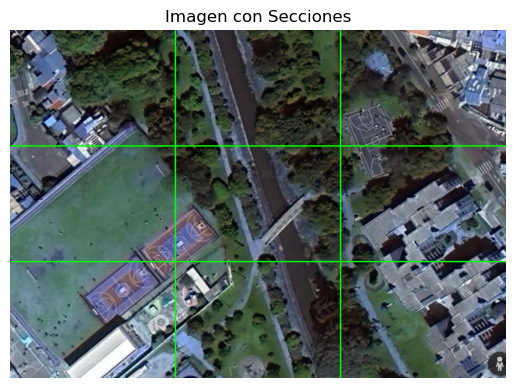

In [51]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import cv2

# Funciones de preprocesamiento
def redimensionar_imagen(img, nuevo_tamanio):
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    img_pil = Image.fromarray(img)
    img_redimensionada = img_pil.resize(nuevo_tamanio, Image.Resampling.LANCZOS)
    return np.array(img_redimensionada)

def normalizar_imagen(img):
    img_normalizada = img / 255.0
    media = np.mean(img_normalizada, axis=(0, 1))
    img_normalizada -= media
    return img_normalizada

def cargar_imagen_de_carpeta(ruta_carpeta):
    archivos = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if archivos:
        ruta_imagen = os.path.join(ruta_carpeta, archivos[0])
        img = cv2.imread(ruta_imagen)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img
    else:
        raise FileNotFoundError("No se encontraron imágenes en la carpeta.")

# Cargar el modelo previamente entrenado
modelo_path = 'C:/Users/nicol/Desktop/PatternNET_Xception.h5'
model = tf.keras.models.load_model(modelo_path)

# Cargar y procesar la imagen
ruta_carpeta_imagenes = 'C:/Users/nicol/Desktop/Imagenes_Prueba_2'
img = cargar_imagen_de_carpeta(ruta_carpeta_imagenes)

# Definir el tamaño de la cuadrícula
grid_size = 3
height, width, _ = img.shape
cell_height = height // grid_size
cell_width = width // grid_size

# Dividir la imagen en secciones y realizar predicciones
predicciones = []
for row in range(grid_size):
    for col in range(grid_size):
        # Coordenadas de la sección
        y_start = row * cell_height
        y_end = (row + 1) * cell_height
        x_start = col * cell_width
        x_end = (col + 1) * cell_width

        # Extraer la sección
        seccion = img[y_start:y_end, x_start:x_end]

        # Redimensionar y normalizar la sección
        seccion_redimensionada = redimensionar_imagen(seccion, (256, 256))
        seccion_normalizada = normalizar_imagen(seccion_redimensionada)

        # Expandir dimensiones para que sea compatible con el modelo
        seccion_normalizada = np.expand_dims(seccion_normalizada, axis=0)

        # Aplicar el modelo a la sección
        prediccion = model.predict(seccion_normalizada)
        predicciones.append(prediccion[0])
        clase_predicha = np.argmax(prediccion)
        print(f"Sección ({row}, {col}): Predicción - Clase {clase_predicha}, Probabilidades - {prediccion[0]}")

# Opcional: Mostrar la imagen con las secciones usando matplotlib
import matplotlib.pyplot as plt

# Dibujar las líneas de la cuadrícula sobre la imagen
for row in range(1, grid_size):
    start_point = (0, row * cell_height)
    end_point = (width, row * cell_height)
    cv2.line(img, start_point, end_point, (0, 255, 0), 2)

for col in range(1, grid_size):
    start_point = (col * cell_width, 0)
    end_point = (col * cell_width, height)
    cv2.line(img, start_point, end_point, (0, 255, 0), 2)

# Mostrar la imagen con las secciones
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen con Secciones")
plt.axis('off')  # Opcional: Ocultar ejes
plt.show()


# Prueba 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step
Sección (0, 0): Predicción - Clase 2, Probabilidades - [8.1161046e-03 5.4111955e-05 9.9179018e-01 2.4386354e-05 1.5260344e-05]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Sección (0, 1): Predicción - Clase 1, Probabilidades - [6.7884167e-07 9.9988472e-01 3.0769592e-05 5.4067471e-08 8.3865911e-05]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Sección (1, 0): Predicción - Clase 2, Probabilidades - [6.7932109e-07 3.7373357e-02 8.4964085e-01 5.3568261e-10 1.1298500e-01]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Sección (1, 1): Predicción - Clase 1, Probabilidades - [5.1252375e-10 8.8051450e-01 3.7602552e-09 3.5575582e-13 1.1948547e-01]
Conteo de clases detectadas en la imagen:
Clase 2: 2 veces
Clase 1: 2 veces


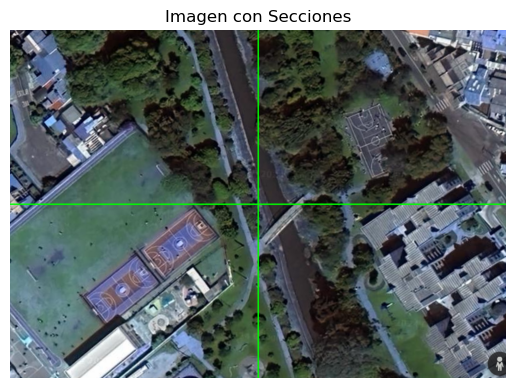

In [53]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Funciones de preprocesamiento
def redimensionar_imagen(img, nuevo_tamanio):
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    img_pil = Image.fromarray(img)
    img_redimensionada = img_pil.resize(nuevo_tamanio, Image.Resampling.LANCZOS)
    return np.array(img_redimensionada)

def normalizar_imagen(img):
    img_normalizada = img / 255.0
    media = np.mean(img_normalizada, axis=(0, 1))
    img_normalizada -= media
    return img_normalizada

def cargar_imagen_de_carpeta(ruta_carpeta):
    archivos = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if archivos:
        ruta_imagen = os.path.join(ruta_carpeta, archivos[0])
        img = cv2.imread(ruta_imagen)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img
    else:
        raise FileNotFoundError("No se encontraron imágenes en la carpeta.")

# Cargar el modelo previamente entrenado
modelo_path = 'C:/Users/nicol/Desktop/PatternNET_Xception.h5'
model = tf.keras.models.load_model(modelo_path)

# Cargar y procesar la imagen
ruta_carpeta_imagenes = 'C:/Users/nicol/Desktop/Imagenes_Prueba_2'
img = cargar_imagen_de_carpeta(ruta_carpeta_imagenes)

# Definir el tamaño de la cuadrícula
grid_size = 2
height, width, _ = img.shape
cell_height = height // grid_size
cell_width = width // grid_size

# Diccionario para contar las predicciones por clase
conteo_clases = {}

# Dividir la imagen en secciones y realizar predicciones
predicciones = []
for row in range(grid_size):
    for col in range(grid_size):
        # Coordenadas de la sección
        y_start = row * cell_height
        y_end = (row + 1) * cell_height
        x_start = col * cell_width
        x_end = (col + 1) * cell_width

        # Extraer la sección
        seccion = img[y_start:y_end, x_start:x_end]

        # Redimensionar y normalizar la sección
        seccion_redimensionada = redimensionar_imagen(seccion, (256, 256))
        seccion_normalizada = normalizar_imagen(seccion_redimensionada)

        # Expandir dimensiones para que sea compatible con el modelo
        seccion_normalizada = np.expand_dims(seccion_normalizada, axis=0)

        # Aplicar el modelo a la sección
        prediccion = model.predict(seccion_normalizada)
        predicciones.append(prediccion[0])
        clase_predicha = np.argmax(prediccion)
        print(f"Sección ({row}, {col}): Predicción - Clase {clase_predicha}, Probabilidades - {prediccion[0]}")

        # Contar las predicciones por clase
        if clase_predicha in conteo_clases:
            conteo_clases[clase_predicha] += 1
        else:
            conteo_clases[clase_predicha] = 1

# Mostrar los conteos de cada clase
print("Conteo de clases detectadas en la imagen:")
for clase, conteo in conteo_clases.items():
    print(f"Clase {clase}: {conteo} veces")

# Dibujar las líneas de la cuadrícula sobre la imagen
for row in range(1, grid_size):
    start_point = (0, row * cell_height)
    end_point = (width, row * cell_height)
    cv2.line(img, start_point, end_point, (0, 255, 0), 2)

for col in range(1, grid_size):
    start_point = (col * cell_width, 0)
    end_point = (col * cell_width, height)
    cv2.line(img, start_point, end_point, (0, 255, 0), 2)

# Mostrar la imagen con las secciones
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen con Secciones")
plt.axis('off')  # Opcional: Ocultar ejes
plt.show()


# Prueba 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
Sección (0, 0): Predicción - Campo de football, Probabilidades - [1.7653129e-01 3.7471935e-05 8.1621897e-01 7.2087753e-03 3.4496322e-06]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Sección (0, 1): Predicción - Campo de baloncesto, Probabilidades - [1.0498855e-10 9.9987149e-01 1.7096183e-06 1.9343240e-13 1.2678951e-04]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Sección (0, 2): Predicción - Campo de baloncesto, Probabilidades - [1.6419377e-04 9.9033362e-01 9.5142855e-04 1.7220866e-06 8.5490504e-03]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Sección (1, 0): Predicción - Campo de baloncesto, Probabilidades - [2.2615926e-02 9.4595617e-01 3.1410947e-02 1.2547756e-05 4.4537042e-06]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Sección (1, 1): Predicción - Campo de baloncesto, Probabilidades - [7.5449883e-08 9.9994683e-01 4.5011979e-07 7.5549889e-10 5.2602056e-05]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Sección (1, 2): Predicción - Cancha de tenis, Probabilidades - [3.7230388e-03 

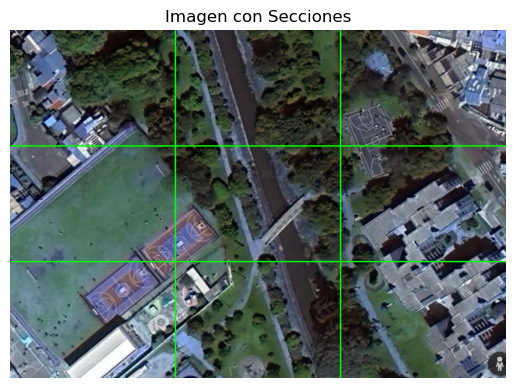

In [55]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Funciones de preprocesamiento
def redimensionar_imagen(img, nuevo_tamanio):
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    img_pil = Image.fromarray(img)
    img_redimensionada = img_pil.resize(nuevo_tamanio, Image.Resampling.LANCZOS)
    return np.array(img_redimensionada)

def normalizar_imagen(img):
    img_normalizada = img / 255.0
    media = np.mean(img_normalizada, axis=(0, 1))
    img_normalizada -= media
    return img_normalizada

def cargar_imagen_de_carpeta(ruta_carpeta):
    archivos = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if archivos:
        ruta_imagen = os.path.join(ruta_carpeta, archivos[0])
        img = cv2.imread(ruta_imagen)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img
    else:
        raise FileNotFoundError("No se encontraron imágenes en la carpeta.")

# Cargar el modelo previamente entrenado
modelo_path = 'C:/Users/nicol/Desktop/PatternNET_Xception.h5'
model = tf.keras.models.load_model(modelo_path)

# Cargar y procesar la imagen
ruta_carpeta_imagenes = 'C:/Users/nicol/Desktop/Imagenes_Prueba_2'
img = cargar_imagen_de_carpeta(ruta_carpeta_imagenes)

# Definir el tamaño de la cuadrícula
grid_size = 3
height, width, _ = img.shape
cell_height = height // grid_size
cell_width = width // grid_size

# Diccionario para contar las predicciones por clase
conteo_clases = {}

# Diccionario para mapear índices a nombres de clases
nombres_clases = {
    0: 'Campo de baseball',
    1: 'Campo de baloncesto',
    2: 'Campo de football',
    3: 'Campo de golf',
    4: 'Cancha de tenis'
}

# Dividir la imagen en secciones y realizar predicciones
predicciones = []
for row in range(grid_size):
    for col in range(grid_size):
        # Coordenadas de la sección
        y_start = row * cell_height
        y_end = (row + 1) * cell_height
        x_start = col * cell_width
        x_end = (col + 1) * cell_width

        # Extraer la sección
        seccion = img[y_start:y_end, x_start:x_end]

        # Redimensionar y normalizar la sección
        seccion_redimensionada = redimensionar_imagen(seccion, (256, 256))
        seccion_normalizada = normalizar_imagen(seccion_redimensionada)

        # Expandir dimensiones para que sea compatible con el modelo
        seccion_normalizada = np.expand_dims(seccion_normalizada, axis=0)

        # Aplicar el modelo a la sección
        prediccion = model.predict(seccion_normalizada)
        predicciones.append(prediccion[0])
        clase_predicha = np.argmax(prediccion)
        nombre_clase = nombres_clases.get(clase_predicha, 'Desconocida')
        print(f"Sección ({row}, {col}): Predicción - {nombre_clase}, Probabilidades - {prediccion[0]}")

        # Contar las predicciones por clase
        if nombre_clase in conteo_clases:
            conteo_clases[nombre_clase] += 1
        else:
            conteo_clases[nombre_clase] = 1

# Mostrar los conteos de cada clase
print("Conteo de clases detectadas en la imagen:")
for nombre_clase, conteo in conteo_clases.items():
    print(f"{nombre_clase}: {conteo} veces")

# Dibujar las líneas de la cuadrícula sobre la imagen
for row in range(1, grid_size):
    start_point = (0, row * cell_height)
    end_point = (width, row * cell_height)
    cv2.line(img, start_point, end_point, (0, 255, 0), 2)

for col in range(1, grid_size):
    start_point = (col * cell_width, 0)
    end_point = (col * cell_width, height)
    cv2.line(img, start_point, end_point, (0, 255, 0), 2)

# Mostrar la imagen con las secciones
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen con Secciones")
plt.axis('off')  # Opcional: Ocultar ejes
plt.show()


# Prueba 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step
Sección (0, 0): Predicción - Campo de baseball, Probabilidades - [9.9999356e-01 8.1428886e-10 1.1404262e-08 6.4886790e-06 1.0124819e-19]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Sección (0, 1): Predicción - Campo de baloncesto, Probabilidades - [5.8397518e-06 9.9999416e-01 2.3728345e-13 1.4525530e-09 4.8540742e-12]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Sección (0, 2): Predicción - Campo de baloncesto, Probabilidades - [2.1765914e-08 9.9997771e-01 4.8641313e-09 7.9445478e-11 2.2306902e-05]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Sección (1, 0): Predicción - Campo de baloncesto, Probabilidades - [8.100399e-06 9.999840e-01 8.176412e-14 6.904133e-12 7.821119e-06]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Sección (1, 1): Predicción - Campo de baloncesto, Probabilidades - [1.1271553e-05 9.9998856e-01 1.3369950e-07 2.8412025e-08 8.5266450e-08]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Sección (1, 2): Predicción - Campo de baloncesto, Probabilidades - [1.4558840e-03 9

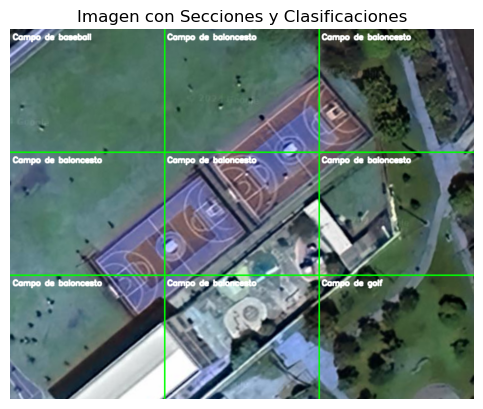

In [67]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Funciones de preprocesamiento
def redimensionar_imagen(img, nuevo_tamanio):
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    img_pil = Image.fromarray(img)
    img_redimensionada = img_pil.resize(nuevo_tamanio, Image.Resampling.LANCZOS)
    return np.array(img_redimensionada)

def normalizar_imagen(img):
    img_normalizada = img / 255.0
    media = np.mean(img_normalizada, axis=(0, 1))
    img_normalizada -= media
    return img_normalizada

def cargar_imagen_de_carpeta(ruta_carpeta):
    archivos = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if archivos:
        ruta_imagen = os.path.join(ruta_carpeta, archivos[0])
        img = cv2.imread(ruta_imagen)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img
    else:
        raise FileNotFoundError("No se encontraron imágenes en la carpeta.")

# Cargar el modelo previamente entrenado
modelo_path = 'C:/Users/nicol/Desktop/PatternNET_Xception.h5'
model = tf.keras.models.load_model(modelo_path)

# Cargar y procesar la imagen
ruta_carpeta_imagenes = 'C:/Users/nicol/Desktop/Imagenes_Prueba_2'
img = cargar_imagen_de_carpeta(ruta_carpeta_imagenes)

# Definir el tamaño de la cuadrícula
grid_size = 3
height, width, _ = img.shape
cell_height = height // grid_size
cell_width = width // grid_size

# Diccionario para contar las predicciones por clase
conteo_clases = {}

# Diccionario para mapear índices a nombres de clases
nombres_clases = {
    0: 'Campo de baseball',
    1: 'Campo de baloncesto',
    2: 'Campo de football',
    3: 'Campo de golf',
    4: 'Cancha de tenis'
}

# Dividir la imagen en secciones y realizar predicciones
predicciones = []
for row in range(grid_size):
    for col in range(grid_size):
        # Coordenadas de la sección
        y_start = row * cell_height
        y_end = (row + 1) * cell_height
        x_start = col * cell_width
        x_end = (col + 1) * cell_width

        # Extraer la sección
        seccion = img[y_start:y_end, x_start:x_end]

        # Redimensionar y normalizar la sección
        seccion_redimensionada = redimensionar_imagen(seccion, (256, 256))
        seccion_normalizada = normalizar_imagen(seccion_redimensionada)

        # Expandir dimensiones para que sea compatible con el modelo
        seccion_normalizada = np.expand_dims(seccion_normalizada, axis=0)

        # Aplicar el modelo a la sección
        prediccion = model.predict(seccion_normalizada)
        predicciones.append(prediccion[0])
        clase_predicha = np.argmax(prediccion)
        nombre_clase = nombres_clases.get(clase_predicha, 'Desconocida')
        print(f"Sección ({row}, {col}): Predicción - {nombre_clase}, Probabilidades - {prediccion[0]}")

        # Contar las predicciones por clase
        if nombre_clase in conteo_clases:
            conteo_clases[nombre_clase] += 1
        else:
            conteo_clases[nombre_clase] = 1

        # Escribir la clasificación sobre la sección
        texto = f"{nombre_clase}"
        posicion_texto = (x_start + 5, y_start + 20)  # Ajusta la posición del texto si es necesario
        cv2.putText(img, texto, posicion_texto, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

# Mostrar los conteos de cada clase
print("Conteo de clases detectadas en la imagen:")
for nombre_clase, conteo in conteo_clases.items():
    print(f"{nombre_clase}: {conteo} veces")

# Dibujar las líneas de la cuadrícula sobre la imagen
for row in range(1, grid_size):
    start_point = (0, row * cell_height)
    end_point = (width, row * cell_height)
    cv2.line(img, start_point, end_point, (0, 255, 0), 2)

for col in range(1, grid_size):
    start_point = (col * cell_width, 0)
    end_point = (col * cell_width, height)
    cv2.line(img, start_point, end_point, (0, 255, 0), 2)

# Mostrar la imagen con las secciones y las clasificaciones
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen con Secciones y Clasificaciones")
plt.axis('off')  # Opcional: Ocultar ejes
plt.show()


# Prueba 6

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step
Sección (0, 0): Predicción - Campo de baloncesto, Probabilidades - [2.5560333e-17 1.0000000e+00 4.9201985e-09 4.5445943e-16 1.5856952e-12]
Conteo de clases detectadas en la imagen:
Campo de baloncesto: 1 veces


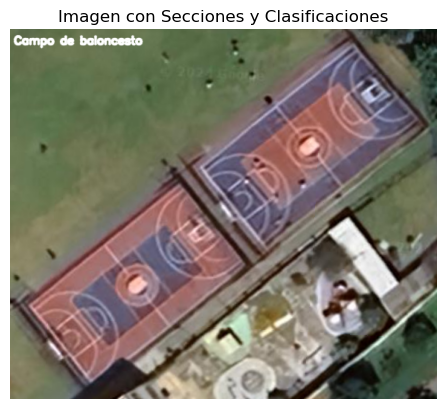

In [2]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Funciones de preprocesamiento
def redimensionar_imagen(img, nuevo_tamanio):
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    img_pil = Image.fromarray(img)
    img_redimensionada = img_pil.resize(nuevo_tamanio, Image.Resampling.LANCZOS)
    return np.array(img_redimensionada)

def normalizar_imagen(img):
    img_normalizada = img / 255.0
    media = np.mean(img_normalizada, axis=(0, 1))
    img_normalizada -= media
    return img_normalizada

def cargar_imagen_de_carpeta(ruta_carpeta):
    archivos = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.lower().endswith(('.png', '.jpg', '.jpeg', '.tif'))]
    if archivos:
        ruta_imagen = os.path.join(ruta_carpeta, archivos[0])
        img = cv2.imread(ruta_imagen)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img
    else:
        raise FileNotFoundError("No se encontraron imágenes en la carpeta.")

# Cargar el modelo previamente entrenado
modelo_path = 'C:/Users/nicol/Desktop/PatternNET_Xception.h5'
model = tf.keras.models.load_model(modelo_path)

# Cargar y procesar la imagen
ruta_carpeta_imagenes = 'C:/Users/nicol/Desktop/Imagenes_Prueba_2'
img = cargar_imagen_de_carpeta(ruta_carpeta_imagenes)

# Definir el tamaño de la cuadrícula
grid_size = 1
height, width, _ = img.shape
cell_height = height // grid_size
cell_width = width // grid_size

# Diccionario para contar las predicciones por clase
conteo_clases = {}

# Diccionario para mapear índices a nombres de clases
nombres_clases = {
    0: 'Campo de baseball',
    1: 'Campo de baloncesto',
    2: 'Campo de football',
    3: 'Campo de golf',
    4: 'Cancha de tenis'
}

# Establecer el umbral de probabilidad para considerar una sección como "vacía"
umbral_probabilidad = 0.8

# Dividir la imagen en secciones y realizar predicciones
predicciones = []
for row in range(grid_size):
    for col in range(grid_size):
        # Coordenadas de la sección
        y_start = row * cell_height
        y_end = (row + 1) * cell_height
        x_start = col * cell_width
        x_end = (col + 1) * cell_width

        # Extraer la sección
        seccion = img[y_start:y_end, x_start:x_end]

        # Redimensionar y normalizar la sección
        seccion_redimensionada = redimensionar_imagen(seccion, (256, 256))
        seccion_normalizada = normalizar_imagen(seccion_redimensionada)

        # Expandir dimensiones para que sea compatible con el modelo
        seccion_normalizada = np.expand_dims(seccion_normalizada, axis=0)

        # Aplicar el modelo a la sección
        prediccion = model.predict(seccion_normalizada)
        predicciones.append(prediccion[0])
        
        # Obtener la clase con la mayor probabilidad
        probabilidad_maxima = np.max(prediccion[0])
        clase_predicha = np.argmax(prediccion[0])
        nombre_clase = nombres_clases.get(clase_predicha, 'Desconocida')

        # Si la probabilidad máxima está por debajo del umbral, asignar "Nada"
        if probabilidad_maxima < umbral_probabilidad:
            nombre_clase = 'Nada'
        
        print(f"Sección ({row}, {col}): Predicción - {nombre_clase}, Probabilidades - {prediccion[0]}")

        # Contar las predicciones por clase
        if nombre_clase in conteo_clases:
            conteo_clases[nombre_clase] += 1
        else:
            conteo_clases[nombre_clase] = 1

        # Escribir la clasificación sobre la sección
        texto = f"{nombre_clase}"
        posicion_texto = (x_start + 5, y_start + 20)  # Ajusta la posición del texto si es necesario
        cv2.putText(img, texto, posicion_texto, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)  # Blanco

# Mostrar los conteos de cada clase
print("Conteo de clases detectadas en la imagen:")
for nombre_clase, conteo in conteo_clases.items():
    print(f"{nombre_clase}: {conteo} veces")

# Dibujar las líneas de la cuadrícula sobre la imagen
for row in range(1, grid_size):
    start_point = (0, row * cell_height)
    end_point = (width, row * cell_height)
    cv2.line(img, start_point, end_point, (0, 255, 0), 2)

for col in range(1, grid_size):
    start_point = (col * cell_width, 0)
    end_point = (col * cell_width, height)
    cv2.line(img, start_point, end_point, (0, 255, 0), 2)

# Mostrar la imagen con las secciones y las clasificaciones
plt.imshow(img)
plt.title("Imagen con Secciones y Clasificaciones")
plt.axis('off')  # Opcional: Ocultar ejes
plt.show()


# -Prueba 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Sección 1: Predicción - Clase Basketball Court, Probabilidades - [1.0392902e-19 1.0000000e+00 2.5500156e-24 1.7950872e-28 1.5161981e-12]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Sección 2: Predicción - Clase Basketball Court, Probabilidades - [2.9203663e-14 9.9991202e-01 8.8011475e-05 2.4368260e-13 6.6789645e-09]


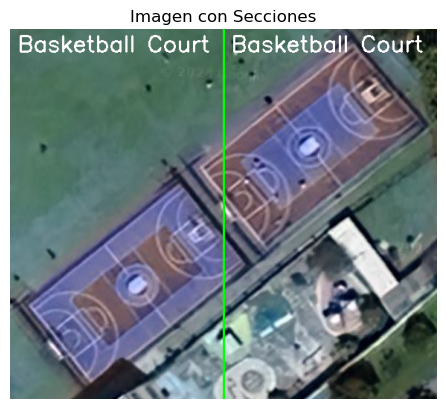


Conteo de clases detectadas en la imagen:
Basketball Court: 2 veces


In [156]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Funciones de preprocesamiento
def redimensionar_imagen(img, nuevo_tamanio):
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    img_pil = Image.fromarray(img)
    img_redimensionada = img_pil.resize(nuevo_tamanio, Image.Resampling.LANCZOS)
    return np.array(img_redimensionada)

def normalizar_imagen(img):
    img_normalizada = img / 255.0
    media = np.mean(img_normalizada, axis=(0, 1))
    img_normalizada -= media
    return img_normalizada

def cargar_imagen_de_carpeta(ruta_carpeta):
    archivos = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if archivos:
        ruta_imagen = os.path.join(ruta_carpeta, archivos[0])
        img = cv2.imread(ruta_imagen)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img
    else:
        raise FileNotFoundError("No se encontraron imágenes en la carpeta.")

# Cargar el modelo previamente entrenado
modelo_path = 'C:/Users/nicol/Desktop/PatternNET_Xception.h5'
model = tf.keras.models.load_model(modelo_path)

# Cargar y procesar la imagen
ruta_carpeta_imagenes = 'C:/Users/nicol/Desktop/Imagenes_Prueba_2'
img = cargar_imagen_de_carpeta(ruta_carpeta_imagenes)

# Número de divisiones (partes)
num_partes = 2

height, width, _ = img.shape
if height > width:
    cell_height = height // num_partes
    cell_width = width
    vertical_split = True
else:
    cell_width = width // num_partes
    cell_height = height
    vertical_split = False

# Dividir la imagen en secciones y realizar predicciones
predicciones = []
conteo_clases = {}

for i in range(num_partes):
    if vertical_split:
        y_start = i * cell_height
        y_end = (i + 1) * cell_height
        x_start, x_end = 0, width
        seccion = img[y_start:y_end, x_start:x_end]
    else:
        x_start = i * cell_width
        x_end = (i + 1) * cell_width
        y_start, y_end = 0, height
        seccion = img[y_start:y_end, x_start:x_end]

    # Redimensionar y normalizar la sección
    seccion_redimensionada = redimensionar_imagen(seccion, (256, 256))
    seccion_normalizada = normalizar_imagen(seccion_redimensionada)

    # Expandir dimensiones para que sea compatible con el modelo
    seccion_normalizada = np.expand_dims(seccion_normalizada, axis=0)

    # Aplicar el modelo a la sección
    prediccion = model.predict(seccion_normalizada)
    predicciones.append(prediccion[0])

    # Identificar la clase con mayor probabilidad
    clase_predicha = np.argmax(prediccion)
    probabilidad = np.max(prediccion)
    if probabilidad < 0.9:  # Umbral para ignorar predicciones con baja confianza
        clase_predicha = "Nada"
    else:
        clase_predicha = {0: 'Baseball Field', 1: 'Basketball Court', 2: 'Football Field', 3: 'Golf Course', 4: 'Tennis Court'}[clase_predicha]
    
    print(f"Sección {i + 1}: Predicción - Clase {clase_predicha}, Probabilidades - {prediccion[0]}")

    # Contar las predicciones por clase
    if clase_predicha in conteo_clases:
        conteo_clases[clase_predicha] += 1
    else:
        conteo_clases[clase_predicha] = 1

    # Dibujar la clasificación sobre la sección
    position = (x_start + 10, y_start + 30) if not vertical_split else (x_start + 10, y_start + 30)
    cv2.putText(img, clase_predicha, position, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Dibujar las líneas divisorias
if vertical_split:
    for i in range(1, num_partes):
        y = i * cell_height
        cv2.line(img, (0, y), (width, y), (0, 255, 0), 2)
else:
    for i in range(1, num_partes):
        x = i * cell_width
        cv2.line(img, (x, 0), (x, height), (0, 255, 0), 2)

# Mostrar la imagen con las secciones
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen con Secciones")
plt.axis('off')
plt.show()

# Mostrar los conteos de cada clase
print("\nConteo de clases detectadas en la imagen:")
for clase, conteo in conteo_clases.items():
    print(f"{clase}: {conteo} veces")


# Prueba 8

C:\Users\nicol\AppData\Local\Temp\ipykernel_27640\1445795155.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(modelo_path)


Sección (0, 0): Predicción - Cancha_Multiple, Probabilidades - [1.4265136e-02 2.8934442e-08 4.6413697e-06 9.8567760e-01 3.7713503e-09
 5.2589923e-05]
Conteo de clases detectadas en la imagen:
Cancha_Multiple: 1 veces


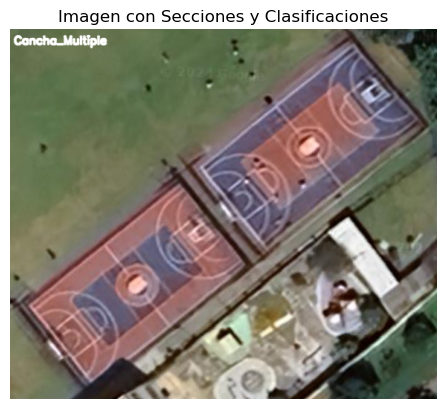

In [8]:
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# Funciones de preprocesamiento
def redimensionar_imagen(img, nuevo_tamanio):
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    img_pil = Image.fromarray(img)
    img_redimensionada = img_pil.resize(nuevo_tamanio, Image.Resampling.LANCZOS)
    return np.array(img_redimensionada)

def normalizar_imagen(img):
    img_normalizada = img / 255.0
    media = np.mean(img_normalizada, axis=(0, 1))
    img_normalizada -= media
    return img_normalizada

def cargar_imagen_de_carpeta(ruta_carpeta):
    archivos = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.lower().endswith(('.png', '.jpg', '.jpeg', '.tif'))]
    if archivos:
        ruta_imagen = os.path.join(ruta_carpeta, archivos[0])
        img = cv2.imread(ruta_imagen)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img
    else:
        raise FileNotFoundError("No se encontraron imágenes en la carpeta.")

# Cargar el modelo de PyTorch
modelo_path = 'C:/Users/nicol/Desktop/DBPropio_mobileNET.pth'
model = torch.load(modelo_path)
model.eval()  # Establecer el modelo en modo evaluación

# Cargar y procesar la imagen
ruta_carpeta_imagenes = 'C:/Users/nicol/Desktop/Imagenes_Prueba_2'
img = cargar_imagen_de_carpeta(ruta_carpeta_imagenes)

# Definir el tamaño de la cuadrícula
grid_size = 1
height, width, _ = img.shape
cell_height = height // grid_size
cell_width = width // grid_size

# Diccionario para contar las predicciones por clase
conteo_clases = {}

# Diccionario para mapear índices a nombres de clases
nombres_clases = {
    0: 'Basket',
    1: 'Campo_Futbol',
    2: 'Cancha_Micro',
    3: 'Cancha_Multiple',
    4: 'Parque',
    5: 'Tenis'
}


# Establecer el umbral de probabilidad para considerar una sección como "vacía"
umbral_probabilidad = 0.1

# Dividir la imagen en secciones y realizar predicciones
predicciones = []
for row in range(grid_size):
    for col in range(grid_size):
        # Coordenadas de la sección
        y_start = row * cell_height
        y_end = (row + 1) * cell_height
        x_start = col * cell_width
        x_end = (col + 1) * cell_width

        # Extraer la sección
        seccion = img[y_start:y_end, x_start:x_end]

        # Redimensionar y normalizar la sección
        seccion_redimensionada = redimensionar_imagen(seccion, (256, 256))
        seccion_normalizada = normalizar_imagen(seccion_redimensionada)

        # Convertir la imagen a un tensor de PyTorch y expandir dimensiones
        seccion_tensor = torch.tensor(seccion_normalizada).permute(2, 0, 1).unsqueeze(0).float()

        # Aplicar el modelo a la sección
        with torch.no_grad():
            prediccion = model(seccion_tensor)
            prediccion_softmax = F.softmax(prediccion, dim=1)
        
        # Obtener la clase con la mayor probabilidad
        probabilidad_maxima = torch.max(prediccion_softmax).item()
        clase_predicha = torch.argmax(prediccion_softmax, dim=1).item()
        nombre_clase = nombres_clases.get(clase_predicha, 'Desconocida')

        # Si la probabilidad máxima está por debajo del umbral, asignar "Nada"
        if probabilidad_maxima < umbral_probabilidad:
            nombre_clase = 'Nada'
        
        print(f"Sección ({row}, {col}): Predicción - {nombre_clase}, Probabilidades - {prediccion_softmax[0].numpy()}")

        # Contar las predicciones por clase
        if nombre_clase in conteo_clases:
            conteo_clases[nombre_clase] += 1
        else:
            conteo_clases[nombre_clase] = 1

        # Escribir la clasificación sobre la sección
        texto = f"{nombre_clase}"
        posicion_texto = (x_start + 5, y_start + 20)  # Ajusta la posición del texto si es necesario
        cv2.putText(img, texto, posicion_texto, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)  # Blanco

# Mostrar los conteos de cada clase
print("Conteo de clases detectadas en la imagen:")
for nombre_clase, conteo in conteo_clases.items():
    print(f"{nombre_clase}: {conteo} veces")

# Dibujar las líneas de la cuadrícula sobre la imagen
for row in range(1, grid_size):
    start_point = (0, row * cell_height)
    end_point = (width, row * cell_height)
    cv2.line(img, start_point, end_point, (0, 255, 0), 2)

for col in range(1, grid_size):
    start_point = (col * cell_width, 0)
    end_point = (col * cell_width, height)
    cv2.line(img, start_point, end_point, (0, 255, 0), 2)

# Mostrar la imagen con las secciones y las clasificaciones
plt.imshow(img)
plt.title("Imagen con Secciones y Clasificaciones")
plt.axis('off')  # Opcional: Ocultar ejes
plt.show()
